# Netflix Data Analsyis 

#### Import Python Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


#### Load the data

In [2]:
#Load the dataset
data=pd.read_csv('netflix.csv')

# disaply datset
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
data.shape

(8790, 10)

In [4]:
data.info

<bound method DataFrame.info of      show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   

In [5]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### Data Cleaning

In [6]:
# check for missing value
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
# drop duplicate value
data.drop_duplicates(inplace=True)

In [8]:
# drop rows with missing critical information
data.dropna(subset=['director','country'],inplace=True)

In [9]:
# Convert 'date_added' to datetime
data['date_added']=pd.to_datetime(data['date_added'])
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


#### Exploratory Data Analysis (EDA)

- Content Type Distributionn of Movies and TV Shows

In [10]:
# Count the number of movies and TV shows
type_counts = data['type'].value_counts()
print(type_counts)


type
Movie      6126
TV Show    2664
Name: count, dtype: int64


C:\Users\RAJVEER SINGHAL\AppData\Local\Temp\ipykernel_21056\602972107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


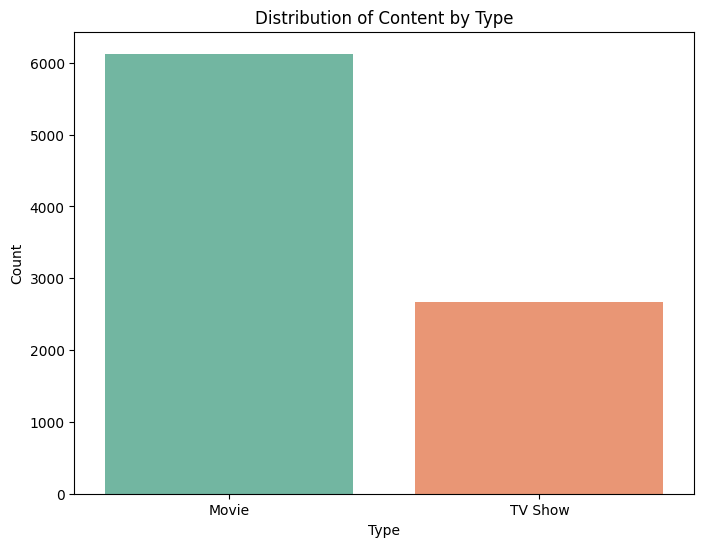

In [11]:
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


- Most Common Genres

In [12]:
# Split the 'listed_in' column and count genres
data['genres']=data['listed_in'].apply(lambda x: x.split(','))
all_genres=sum(data['genres'],[])
genre_counts=pd.Series(all_genres).value_counts().head(10)

C:\Users\RAJVEER SINGHAL\AppData\Local\Temp\ipykernel_21056\2791180886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


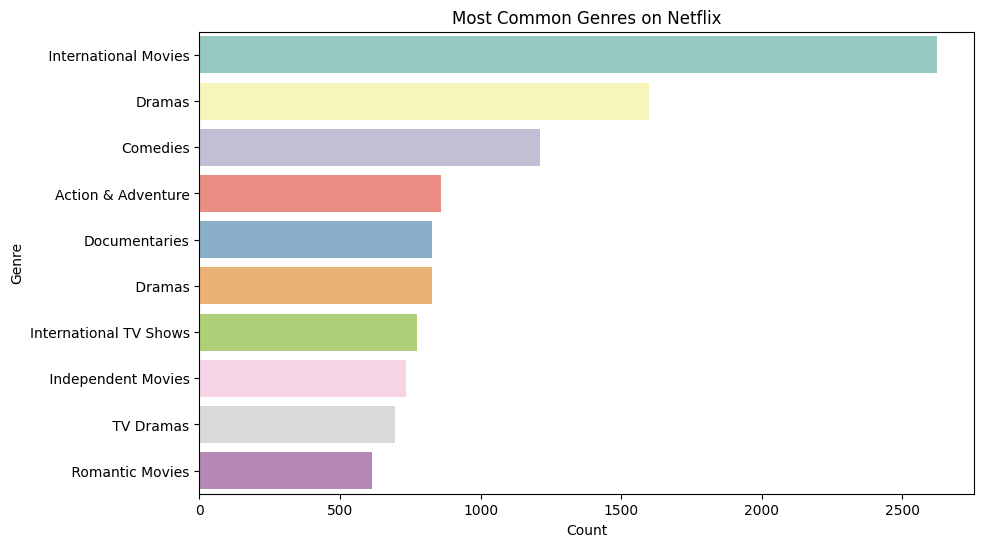

In [13]:
# Plot the common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

- Content Added Over Time

In [14]:
# Extract year and month form 'date_added'

data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month

In [15]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021,9


C:\Users\RAJVEER SINGHAL\AppData\Local\Temp\ipykernel_21056\757360211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added',data=data,palette='coolwarm')


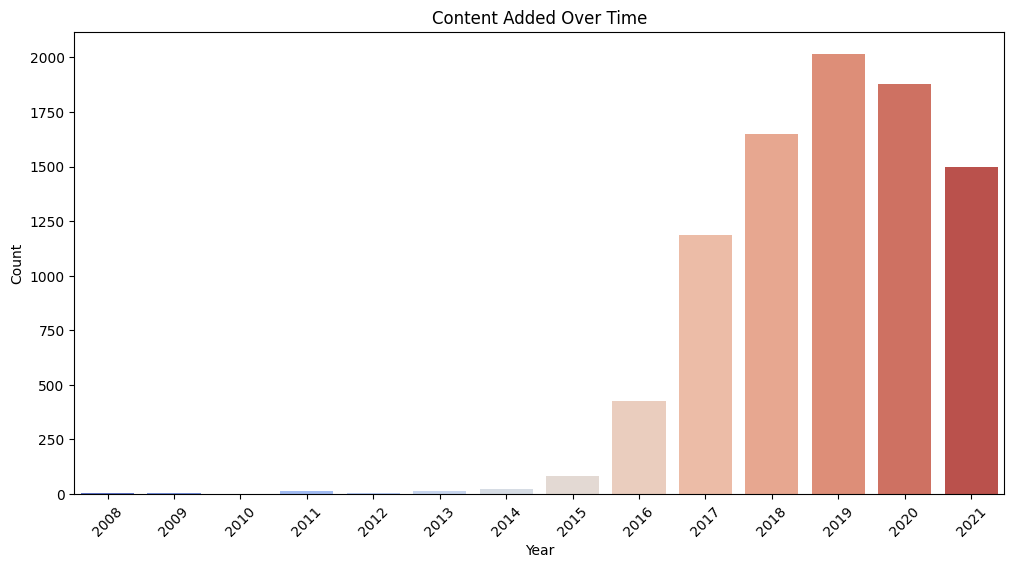

In [16]:
#plot content added over the years
plt.figure(figsize=(12,6))
sns.countplot(x='year_added',data=data,palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Top 10 Directors with the Most Titles

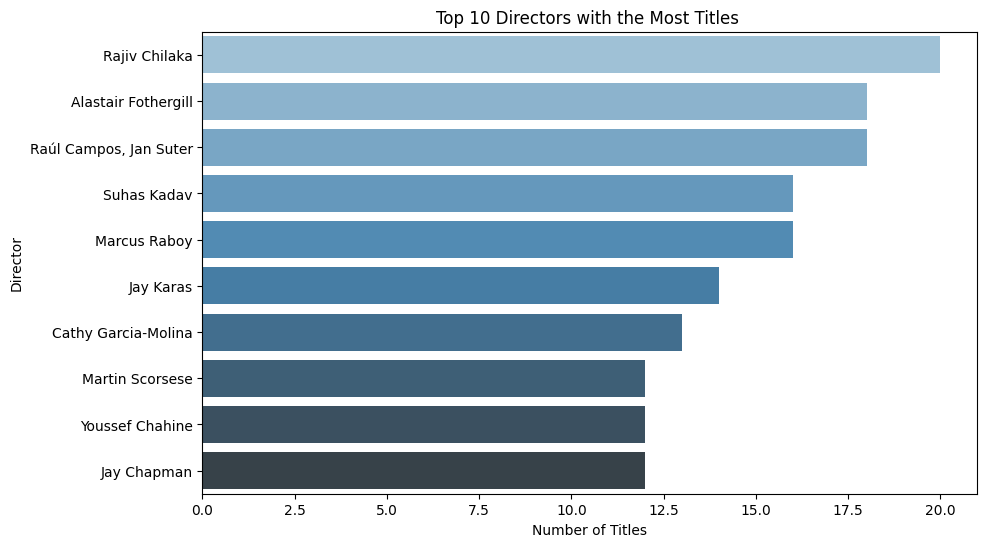

In [17]:
# Count titles by director
top_directors = data['director'].value_counts()
top_directors = top_directors[top_directors <= 30].head(10)

# Plot the top directors with the updated hue parameter
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.index, palette='Blues_d', legend=False)
plt.title('Top 10 Directors with the Most Titles ')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


- World Cloud of Movie Titles

In [18]:


# Filter movie titles
movie_titles = data[data['type'] == 'Movie']['title']

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))


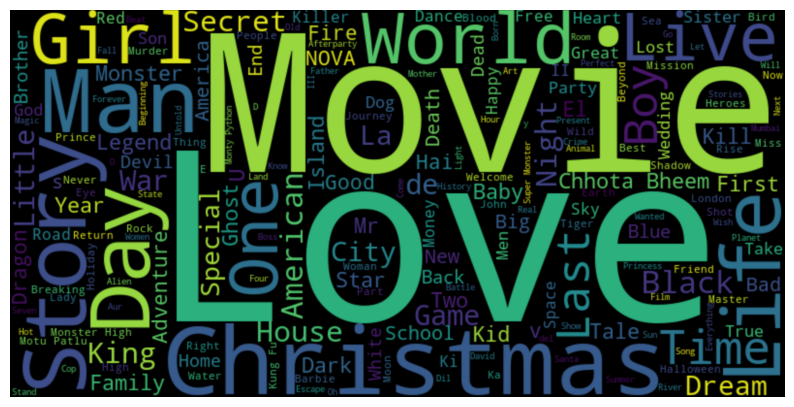

In [19]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')  # Hide axes
plt.show()

#### Feature Enginerring

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  genres        8790 non-null   object        
 11  year_added    8790 non-null   int32         
 12  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 824.2+ KB


In [21]:
data.shape

(8790, 13)

In [22]:
# Convert any unhashable column values to strings
data = data.applymap(lambda x: str(x) if isinstance(x, list) else x)

# Now drop duplicates
data = data.drop_duplicates()


C:\Users\RAJVEER SINGHAL\AppData\Local\Temp\ipykernel_21056\176967991.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: str(x) if isinstance(x, list) else x)


In [23]:
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

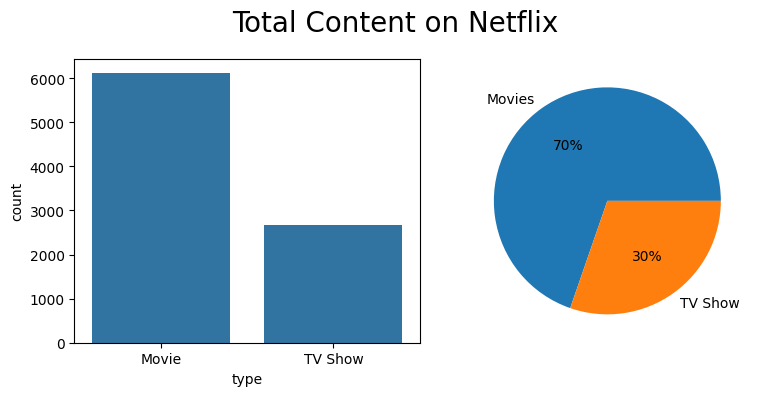

In [24]:

freq = data['type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Countplot
sns.countplot(data=data, x='type', ax=axes[0])

# Pie chart
axes[1].pie(freq, labels=['Movies', 'TV Show'], autopct='%.0f%%')

plt.suptitle('Total Content on Netflix', fontsize=20)
plt.tight_layout()
plt.show()


In [25]:
#rating
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [26]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)

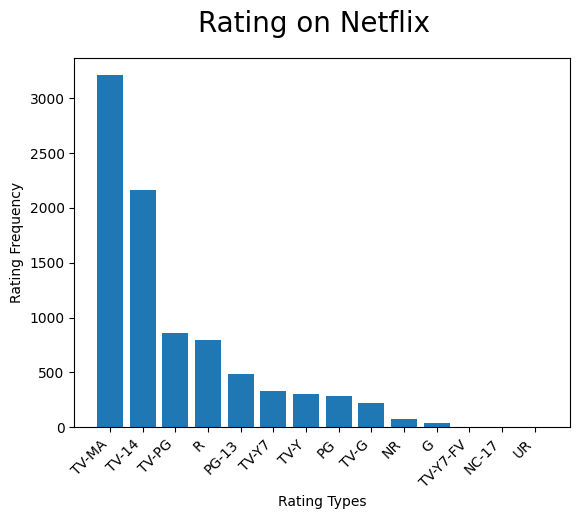

In [27]:
#plot rating

plt.bar(ratings['rating'],ratings['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel('Rating Types')
plt.ylabel('Rating Frequency')
plt.suptitle('Rating on Netflix',fontsize=20)
plt.show()

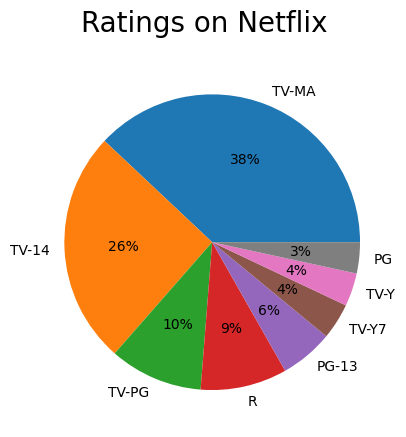

In [28]:

plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.suptitle('Ratings on Netflix', fontsize=20)
plt.show()


In [29]:
data.describe()

,date_added,release_year,year_added,month_added
count,8790,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.825466,1.573568,3.436103


In [30]:
data['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

- Top 10 countries with most content on Netflix

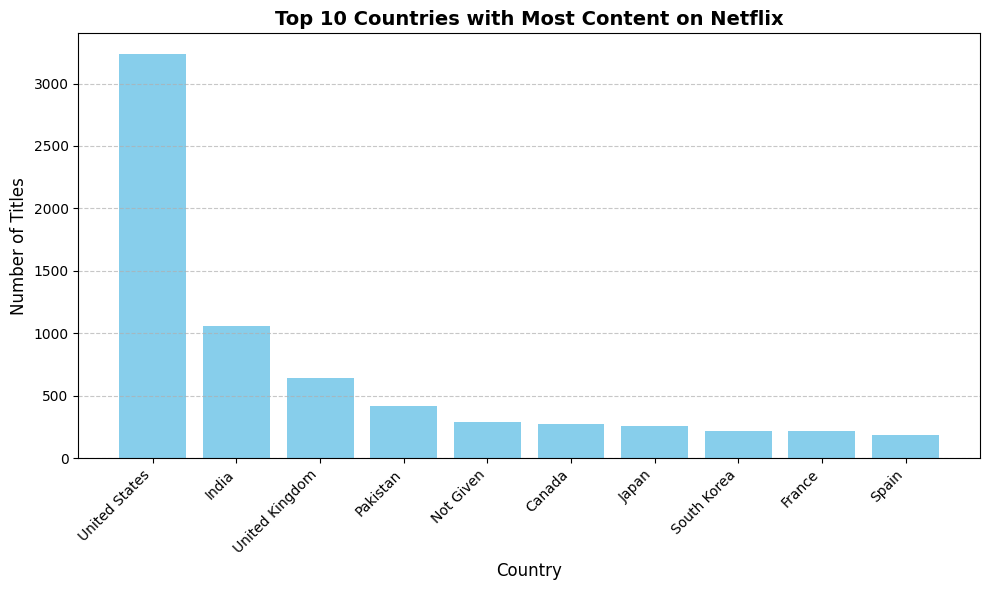

In [31]:

#  the top 10 countries with the most content
top_ten_countries = data['country'].value_counts().reset_index()
top_ten_countries.columns = ['Country', 'Frequency']
top_ten_countries = top_ten_countries.sort_values(by='Frequency', ascending=False)[:10]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['Country'], top_ten_countries['Frequency'], color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.title('Top 10 Countries with Most Content on Netflix', fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines for readability
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()


In [32]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,['Documentaries'],2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","['Crime TV Shows', ' International TV Shows', ...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","['TV Dramas', ' TV Horror', ' TV Mysteries']",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","['Children & Family Movies', ' Comedies']",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","['Dramas', ' Independent Movies', ' Internatio...",2021,9


In [33]:
data = data.rename(columns={'year_added': 'year'})
data = data.rename(columns={'month_added': 'month'})


data.head()

### Montly releases of Movies and TV shows on Netflix

In [34]:
# Filter monthly release of movies
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()

# Filter monthly release of TV shows
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()


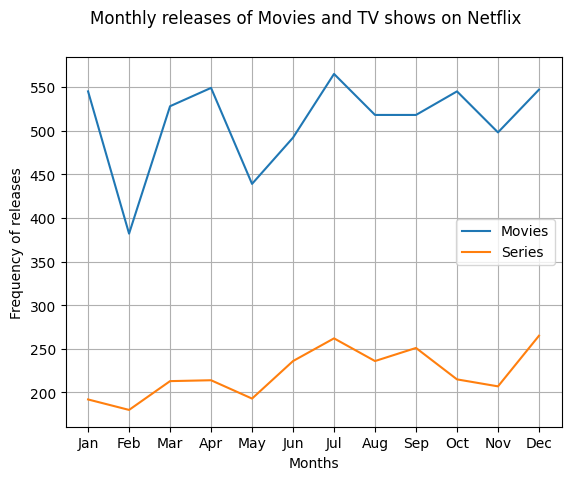

In [35]:


plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')

plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)

plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()


### Yearly releases of Movies and TV Shows on Netflix

In [36]:
# Filter yearly release of movies
yearly_movie_release=data[data['type']=='Movie']['year'].value_counts().sort_index()

# Filter yearly release of TV shows
yearly_series_release=data[data['type']=='TV Show']['year'].value_counts().sort_index()


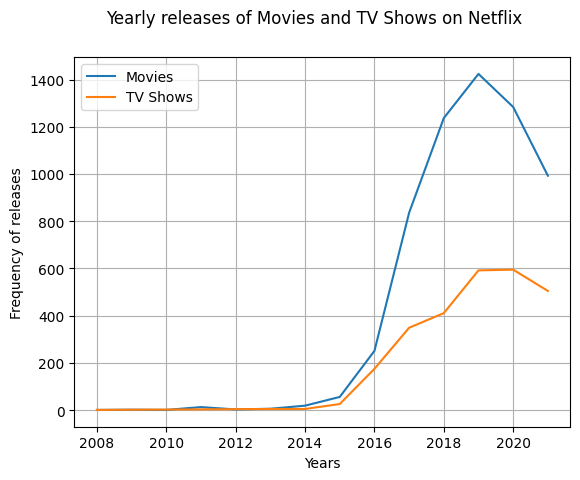

In [37]:


plt.plot(yearly_movie_release.index, yearly_movie_release.values, label='Movies')
plt.plot(yearly_series_release.index, yearly_series_release.values, label='TV Shows')

plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)

plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()
plt.show()


# Top 10 popular movie genres


In [38]:
# Filter top 10 genre of movies and Tv shows
popular_movie_genre=data[data['type']=='Movie'].groupby('listed_in').size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby('listed_in').size().sort_values(ascending=False)[:10]


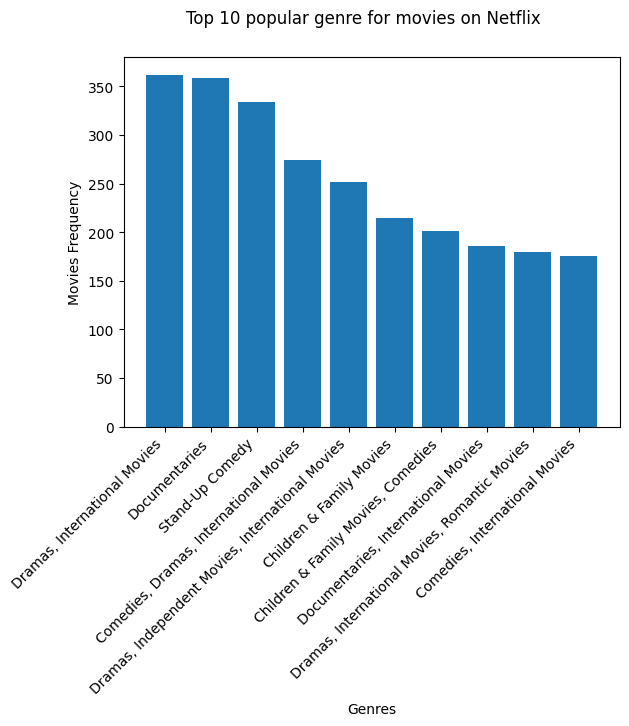

In [39]:
plt.bar(popular_movie_genre.index,popular_movie_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Genres')
plt.ylabel('Movies Frequency')
plt.suptitle('Top 10 popular genre for movies on Netflix')
plt.show()

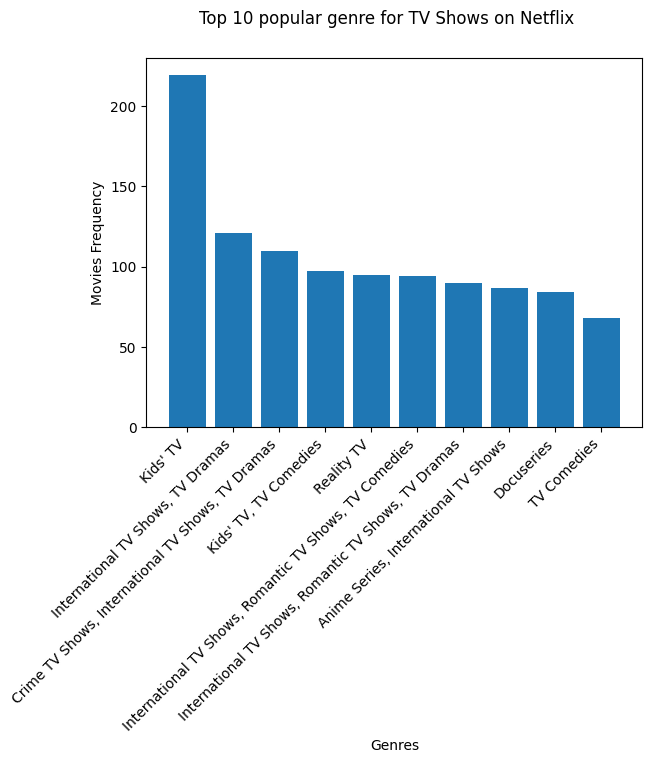

In [40]:
plt.bar(popular_series_genre.index,popular_series_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Genres')
plt.ylabel('Movies Frequency')
plt.suptitle('Top 10 popular genre for TV Shows on Netflix')
plt.show()

###  Top 15 directors across Netflix with hoigh frequency of movies and shows.


In [41]:
directors=data['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:15]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

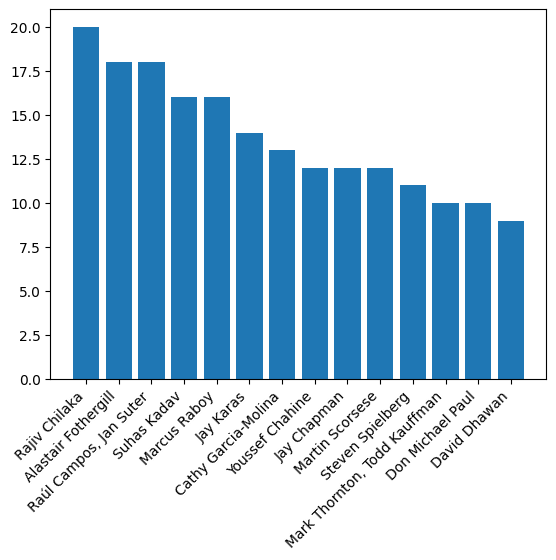

In [42]:
plt.bar(directors['director'],directors['count'])
plt.xticks(rotation=45, ha ='right')

In [47]:
data.to_excel('cleaned_netflix_dataset.xlsx', index=False)